In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import math
from sklearn.cluster import KMeans
%matplotlib inline
import sys

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
sys.path.append("..")
from framework import perspective_transform
from framework import visualize
from framework import edges_detection

In [3]:
verbose = 4

In [4]:
# data_path = "/home/avk/study/1C/Diplom/data/NewData/samples/"
data_path = "/home/avk/study/1C/Diplom/PerspectiveDistortion/SampleData/"

In [5]:
# # for file_num, filename in enumerate(os.listdir(data_path)):
# #     full_file_path = os.path.join(data_path, filename)
# #     if file_num == 5:
# # #     if file_num == 2:
# #         break
# # file_num
# full_file_path = "/home/avk/study/1C/Diplom/PerspectiveDistortion/SampleData/IMG_20190317_170456.jpg"

In [6]:
for file_num, filename in enumerate(os.listdir(data_path)):
    full_file_path = os.path.join(data_path, filename)
#     if file_num == 3: #4 # 6 # 7 # 5 -unreal!
# to show: 
# 0 - example before-after
# 1 - easy case
# 2 - interesting additional edges
# 3 - horizontal
# 4 vs 5 - laminat
# 6 - white background
# 7 - folder
# 8 - angle
# 9 - additional blur
# 10 - fail
    if file_num == 0:
        break
file_num

0

In [7]:
full_file_path = "/home/avk/study/1C/Diplom/PerspectiveDistortion/0.jpg"
# full_file_path = "/home/avk/Downloads/im.jpg"
# full_file_path = "/home/avk/study/1C/DiplomText/Tex/img/perspective_distortion/problem/1.jpg"
# full_file_path = "/home/avk/study/1C/Diplom/Pandore/pandore1/bin/experiments/0.png"

In [8]:
initial_image = cv2.imread(full_file_path)
if verbose >= 1:
    visualize.visualize_image(initial_image)
initial_image.shape

(1600, 1196, 3)

# Уменьшение изображения

In [9]:
resized_image, resizing_ratio = edges_detection.reduce_image_size(initial_image)
if verbose >= 3:
    visualize.visualize_image(resized_image)
resized_image.shape

(401, 300, 3)

# Размытие текста

In [10]:
# for times in range(1, 8):
#     smoothed_image = edges_detection.blur_image(resized_image, cv2.medianBlur, 5, times)
#     visualize.visualize_image(smoothed_image, str(times))

In [11]:
smoothed_image = edges_detection.blur_image(resized_image, cv2.medianBlur, 5, 3)
if verbose >= 3:
    visualize.visualize_image(smoothed_image)

# Выделение границ

In [12]:
# edges = cv2.Canny(smoothed_image, 10, 50)
# visualize.visualize_image(edges)

In [13]:
# grey_image = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2GRAY)
# if verbose >= 3:
#     visualize.visualize_image(grey_image)

In [14]:
edges = edges_detection.canny_edge_detector(smoothed_image)
if verbose >= 2:
    visualize.visualize_image(edges)

For CannyEdgeDetection greyscale image was chosen


# Построение линий Хафа

In [15]:
hough_lines = edges_detection.find_hough_lines(edges, mode="skimage")
# print(len(hough_lines[0]), len(hough_lines[1]))
# assert(min(len(hough_lines[0]), len(hough_lines[1])) >= 2)
print(len(hough_lines))

Number of detected lines  4
2


In [16]:
cdst = edges_detection.draw_lines_on_edges(edges, hough_lines)
if verbose >= 3:
    visualize.visualize_image(cdst)
print(hough_lines)

[[[[51.55144855144863, 0.02632619542114334]], [[254.75424575424586, -0.043876992368572676]]], [[[38.53846153846155, 1.5532455298474672]], [[-338.8381618381618, -1.5532455298474674]]]]


1.508379888268146 51.55144855144863
-2.5139664804469355 254.75424575424586
88.99441340782121 38.53846153846155
-88.99441340782121 -338.8381618381618


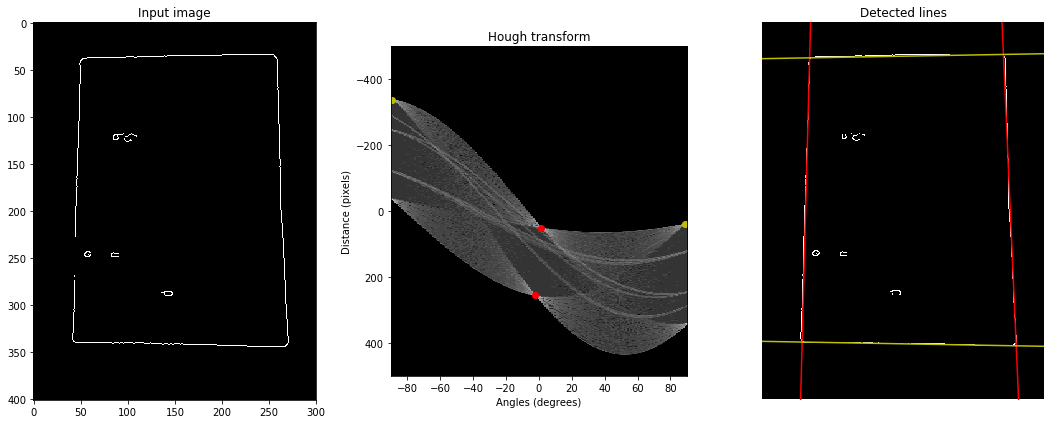

1.508379888268146 51.55144855144863
-2.5139664804469355 254.75424575424586
88.99441340782121 38.53846153846155
-88.99441340782121 -338.8381618381618


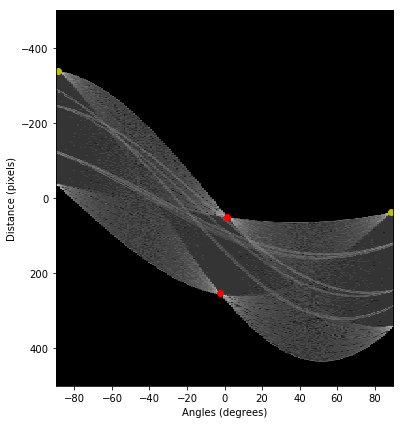

In [17]:
if verbose >= 3:
    h, theta, d = hough_line(edges)

    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(edges, cmap=cm.gray)
    ax[0].set_title('Input image')
    # ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
                 extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]],
                 cmap=cm.gray, aspect=1/5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    # ax[1].axis('image')

    ax[2].imshow(edges, cmap=cm.gray)
    
    for j, color in zip(range(2), ["r", "y"]):
        for i in range(0, len(hough_lines[j])):
            dist, angle = hough_lines[j][i][0]
            print(angle / np.pi * 180, dist)
            ax[1].plot(np.rad2deg(angle), dist, color + "o")
            y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
            y1 = (dist - edges.shape[1] * np.cos(angle)) / np.sin(angle)
            ax[2].plot((0, edges.shape[1]), (y0, y1), '-' + color)
    ax[2].set_xlim((0, edges.shape[1]))
    ax[2].set_ylim((edges.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')

    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 6))
    plt.imshow(np.log(1 + h),
                 extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]],
                 cmap=cm.gray, aspect=1/5)
    # plt.title('Hough transform')
    plt.xlabel('Angles (degrees)')
    plt.ylabel('Distance (pixels)')
    plt.tight_layout()
    plt.savefig("hough_transform.jpg", bbox_inches='tight')
    
    for j, color in zip(range(2), ["r", "y"]):
        for i in range(0, len(hough_lines[j])):
            dist, angle = hough_lines[j][i][0]
            print(angle / np.pi * 180, dist)
            plt.plot(np.rad2deg(angle), dist, color + "o")

    plt.savefig("hough_transform_with_points.jpg", bbox_inches='tight')

# Поиск пересечений линий

In [18]:
intersections = edges_detection.segmented_intersections(hough_lines)
len(intersections)

4

In [19]:
for point in intersections:
    cv2.circle(cdst, point, 3, (0, 255, 0), -1)
if verbose >= 3:
    visualize.visualize_image(cdst)

# Кластеризация точек пересечения

In [20]:
corners = KMeans(n_clusters=4).fit(np.array(intersections)).cluster_centers_

In [21]:
for corner in corners:
    corner = tuple(np.array(corner, dtype=int))
    cv2.circle(cdst, corner, 3, (255, 255, 0), -1)

if verbose >= 2:    
    visualize.visualize_image(cdst)

# Работа с изначальным (неуменьшенным) изображением

In [22]:
corners = np.array(corners * resizing_ratio, dtype=int)
corners

array([[ 171, 1355],
       [ 203,  151],
       [1076, 1371],
       [1020,  135]])

In [23]:
restored = perspective_transform.remove_perspective_distortion(initial_image, corners)
if verbose >= 1:
    visualize.visualize_image(restored)
restored.shape, restored.shape[0] / restored.shape[1]

mode == naive
1.3657458563535911
mode == habr
1.4701834862385321
mode == zhang
0.9753490253059004 0.9042877951191929
hight / width: 1.4130086198700198
width / hight: 0.7077097661951901


((1277, 904, 3), 1.4126106194690264)